# Import Required Libraries
Import the necessary libraries, including pandas and Rasa.

In [1]:
import pandas as pd
import spacy

# Load Dataset
Load the dataset containing sentences using pandas.

In [3]:
# Load the dataset containing sentences using pandas
df_sentences = pd.read_csv('./data/scrapped/sentences.csv')

# Display the first few rows of the dataframe to verify the data
df_sentences.head()

,sentenceID,sentence,label,departure,destination
0,1,Réserver un billet pour Nantes,TRIP_ORDER,NaN,Nantes
1,2,Aller à Lyon pour une réunion,TRIP_ORDER,NaN,Lyon
2,3,This is not French,NOT_FRENCH,NaN,NaN
3,4,Réserver un hôtel à Bordeaux,NOT_TRIP,NaN,NaN
4,5,Visiter la Tour Eiffel,TRIP_ORDER,NaN,Paris


# Preprocess Data
Preprocess the data to prepare it for training the Rasa model.

In [23]:
def extract_departure_and_destination(row):
    result = []
    text = row['sentence']
    departure = row['departure']
    destination = row['destination']
    print(destination)
    if pd.notna(departure):
        start_departure = text.find(departure)
        end_departure = start_departure + len(departure)
        print(f"DEPARTURE: ({start_departure}, {end_departure})")
        result.append((start_departure, end_departure,"DEPARTURE"))
    else:
        row['departure'] = None
    if pd.notna(destination):
        start_destination = text.find(destination)
        end_destination = start_destination + len(destination)
        print(f"DESTINATION: ({start_destination}, {end_destination})")
        result.append((start_destination, end_destination,"DESTINATION"))
    else:
        row['destination'] = None
    row["entities"] = result
    return row

# Appliquer les modifications sur chaque ligne
data = df_sentences.apply(extract_departure_and_destination, axis=1)

Nantes
DESTINATION: (24, 30)
Lyon
DESTINATION: (8, 12)
nan
nan
Paris
DESTINATION: (-1, 4)
Marseille
DESTINATION: (22, 31)
Lyon
DEPARTURE: (17, 22)
DESTINATION: (25, 29)
Rennes
DEPARTURE: (10, 19)
DESTINATION: (39, 45)
nan
Nice
DESTINATION: (20, 24)
nan
Marseille
DESTINATION: (14, 23)
nan
Toulouse
DESTINATION: (22, 30)
nan
Montpellier
DESTINATION: (25, 36)
nan
nan
Strasbourg
DESTINATION: (8, 18)
Nice
DEPARTURE: (11, 16)
DESTINATION: (30, 34)
Marseille
DEPARTURE: (12, 16)
DESTINATION: (32, 41)
nan
Toulouse
DEPARTURE: (20, 25)
DESTINATION: (28, 36)
nan
Nice
DEPARTURE: (26, 32)
DESTINATION: (35, 39)
Lyon
DEPARTURE: (11, 20)
DESTINATION: (23, 27)
nan
nan
nan
Strasbourg
DEPARTURE: (11, 16)
DESTINATION: (19, 29)
nan
Avignon
DESTINATION: (28, 35)
nan
Grenoble
DESTINATION: (27, 35)
nan
Lyon
DEPARTURE: (13, 17)
DESTINATION: (20, 24)
nan
Montpellier
DESTINATION: (33, 44)
Lille
DEPARTURE: (10, 16)
DESTINATION: (36, 41)
nan
Rennes
DEPARTURE: (10, 17)
DESTINATION: (20, 26)
Marseille
DESTINATION: (22

In [24]:
data.head()

,sentenceID,sentence,label,departure,destination,entities
0,1,Réserver un billet pour Nantes,TRIP_ORDER,None,Nantes,"[(24, 30, DESTINATION)]"
1,2,Aller à Lyon pour une réunion,TRIP_ORDER,None,Lyon,"[(8, 12, DESTINATION)]"
2,3,This is not French,NOT_FRENCH,None,None,[]
3,4,Réserver un hôtel à Bordeaux,NOT_TRIP,None,None,[]
4,5,Visiter la Tour Eiffel,TRIP_ORDER,None,Paris,"[(-1, 4, DESTINATION)]"


In [ ]:
# Convertir le DataFrame en JSON
data = data.drop(columns=["departure", "destination","sentenceID"])
training_data = data.to_dict(orient="records")

[{'sentence': 'Réserver un billet pour Nantes', 'label': 'TRIP_ORDER', 'entities': [(24, 30, 'DESTINATION')]}, {'sentence': 'Aller à Lyon pour une réunion', 'label': 'TRIP_ORDER', 'entities': [(8, 12, 'DESTINATION')]}, {'sentence': 'This is not French', 'label': 'NOT_FRENCH', 'entities': []}, {'sentence': 'Réserver un hôtel à Bordeaux', 'label': 'NOT_TRIP', 'entities': []}, {'sentence': 'Visiter la Tour Eiffel', 'label': 'TRIP_ORDER', 'entities': [(-1, 4, 'DESTINATION')]}, {'sentence': 'Prendre le train pour Marseille', 'label': 'TRIP_ORDER', 'entities': [(22, 31, 'DESTINATION')]}, {'sentence': 'Je veux aller de Brest à Lyon', 'label': 'TRIP_ORDER', 'entities': [(17, 22, 'DEPARTURE'), (25, 29, 'DESTINATION')]}, {'sentence': 'je suis à Marseille et je veux aller à Rennes', 'label': 'TRIP_ORDER', 'entities': [(10, 19, 'DEPARTURE'), (39, 45, 'DESTINATION')]}, {'sentence': 'Are you sure about that ?', 'label': 'NOT_FRENCH', 'entities': []}, {'sentence': 'Je dois me rendre à Nice demain', '

In [ ]:
for row in training_data:
    row["cats"] = {"TRIP_ORDER": 0.0, "NOT_TRIP": 0.0, "NOT_FRENCH": 0.0}
    row["cats"][row["label"]] = 1.0
import json
with open("training_data.json", "w", encoding="utf-8") as file:
    json.dump(training_data, file, ensure_ascii=False, indent=4)


{'sentence': 'Réserver un billet pour Nantes', 'label': 'TRIP_ORDER', 'entities': [(24, 30, 'DESTINATION')], 'cats': {'TRIP_ORDER': 1.0, 'NOT_TRIP': 0.0, 'NOT_FRENCH': 0.0}}


{'sentence': 'Aller à Lyon pour une réunion', 'label': 'TRIP_ORDER', 'entities': [(8, 12, 'DESTINATION')], 'cats': {'TRIP_ORDER': 1.0, 'NOT_TRIP': 0.0, 'NOT_FRENCH': 0.0}}


{'sentence': 'This is not French', 'label': 'NOT_FRENCH', 'entities': [], 'cats': {'TRIP_ORDER': 0.0, 'NOT_TRIP': 0.0, 'NOT_FRENCH': 1.0}}


{'sentence': 'Réserver un hôtel à Bordeaux', 'label': 'NOT_TRIP', 'entities': [], 'cats': {'TRIP_ORDER': 0.0, 'NOT_TRIP': 1.0, 'NOT_FRENCH': 0.0}}


{'sentence': 'Visiter la Tour Eiffel', 'label': 'TRIP_ORDER', 'entities': [(-1, 4, 'DESTINATION')], 'cats': {'TRIP_ORDER': 1.0, 'NOT_TRIP': 0.0, 'NOT_FRENCH': 0.0}}


{'sentence': 'Prendre le train pour Marseille', 'label': 'TRIP_ORDER', 'entities': [(22, 31, 'DESTINATION')], 'cats': {'TRIP_ORDER': 1.0, 'NOT_TRIP': 0.0, 'NOT_FRENCH': 0.0}}


{'sentence': 'Je

In [6]:
nlp = spacy.load("fr_core_news_sm", disable=["lemmatizer"])
ner = nlp.get_pipe("ner")

In [5]:
import json

# Charger les données JSON
with open("training_data.json", "r", encoding="utf-8") as file:
    training_data = json.load(file)

print(training_data)

[{'sentence': 'Réserver un billet pour Nantes', 'label': 'TRIP_ORDER', 'entities': [[24, 30, 'DESTINATION']], 'cats': {'TRIP_ORDER': 1.0, 'NOT_TRIP': 0.0, 'NOT_FRENCH': 0.0}}, {'sentence': 'Aller à Lyon pour une réunion', 'label': 'TRIP_ORDER', 'entities': [[8, 12, 'DESTINATION']], 'cats': {'TRIP_ORDER': 1.0, 'NOT_TRIP': 0.0, 'NOT_FRENCH': 0.0}}, {'sentence': 'This is not French', 'label': 'NOT_FRENCH', 'entities': [], 'cats': {'TRIP_ORDER': 0.0, 'NOT_TRIP': 0.0, 'NOT_FRENCH': 1.0}}, {'sentence': 'Réserver un hôtel à Bordeaux', 'label': 'NOT_TRIP', 'entities': [], 'cats': {'TRIP_ORDER': 0.0, 'NOT_TRIP': 1.0, 'NOT_FRENCH': 0.0}}, {'sentence': 'Visiter la Tour Eiffel', 'label': 'TRIP_ORDER', 'entities': [[-1, 4, 'DESTINATION']], 'cats': {'TRIP_ORDER': 1.0, 'NOT_TRIP': 0.0, 'NOT_FRENCH': 0.0}}, {'sentence': 'Prendre le train pour Marseille', 'label': 'TRIP_ORDER', 'entities': [[22, 31, 'DESTINATION']], 'cats': {'TRIP_ORDER': 1.0, 'NOT_TRIP': 0.0, 'NOT_FRENCH': 0.0}}, {'sentence': 'Je veux

In [11]:
training_data

[{'sentence': 'Réserver un billet pour Nantes',
  'label': 'TRIP_ORDER',
  'entities': [[24, 30, 'DESTINATION']],
  'cats': {'TRIP_ORDER': 1.0, 'NOT_TRIP': 0.0, 'NOT_FRENCH': 0.0}},
 {'sentence': 'Aller à Lyon pour une réunion',
  'label': 'TRIP_ORDER',
  'entities': [[8, 12, 'DESTINATION']],
  'cats': {'TRIP_ORDER': 1.0, 'NOT_TRIP': 0.0, 'NOT_FRENCH': 0.0}},
 {'sentence': 'This is not French',
  'label': 'NOT_FRENCH',
  'entities': [],
  'cats': {'TRIP_ORDER': 0.0, 'NOT_TRIP': 0.0, 'NOT_FRENCH': 1.0}},
 {'sentence': 'Réserver un hôtel à Bordeaux',
  'label': 'NOT_TRIP',
  'entities': [],
  'cats': {'TRIP_ORDER': 0.0, 'NOT_TRIP': 1.0, 'NOT_FRENCH': 0.0}},
 {'sentence': 'Visiter la Tour Eiffel',
  'label': 'TRIP_ORDER',
  'entities': [[-1, 4, 'DESTINATION']],
  'cats': {'TRIP_ORDER': 1.0, 'NOT_TRIP': 0.0, 'NOT_FRENCH': 0.0}},
 {'sentence': 'Prendre le train pour Marseille',
  'label': 'TRIP_ORDER',
  'entities': [[22, 31, 'DESTINATION']],
  'cats': {'TRIP_ORDER': 1.0, 'NOT_TRIP': 0.0, '

In [12]:
formatted_training_data = [
    (
        item["sentence"],
        {
            "cats": item["cats"],
            "entities": [tuple(entity) for entity in item["entities"]]
        }
    )
    for item in training_data
]

print(formatted_training_data)  # Vérifie le format

[('Réserver un billet pour Nantes', {'cats': {'TRIP_ORDER': 1.0, 'NOT_TRIP': 0.0, 'NOT_FRENCH': 0.0}, 'entities': [(24, 30, 'DESTINATION')]}), ('Aller à Lyon pour une réunion', {'cats': {'TRIP_ORDER': 1.0, 'NOT_TRIP': 0.0, 'NOT_FRENCH': 0.0}, 'entities': [(8, 12, 'DESTINATION')]}), ('This is not French', {'cats': {'TRIP_ORDER': 0.0, 'NOT_TRIP': 0.0, 'NOT_FRENCH': 1.0}, 'entities': []}), ('Réserver un hôtel à Bordeaux', {'cats': {'TRIP_ORDER': 0.0, 'NOT_TRIP': 1.0, 'NOT_FRENCH': 0.0}, 'entities': []}), ('Visiter la Tour Eiffel', {'cats': {'TRIP_ORDER': 1.0, 'NOT_TRIP': 0.0, 'NOT_FRENCH': 0.0}, 'entities': [(-1, 4, 'DESTINATION')]}), ('Prendre le train pour Marseille', {'cats': {'TRIP_ORDER': 1.0, 'NOT_TRIP': 0.0, 'NOT_FRENCH': 0.0}, 'entities': [(22, 31, 'DESTINATION')]}), ('Je veux aller de Brest à Lyon', {'cats': {'TRIP_ORDER': 1.0, 'NOT_TRIP': 0.0, 'NOT_FRENCH': 0.0}, 'entities': [(17, 22, 'DEPARTURE'), (25, 29, 'DESTINATION')]}), ('je suis à Marseille et je veux aller à Rennes', {'c

In [13]:
import spacy
from spacy.training.example import Example

# Charger un modèle vide pour le français
nlp = spacy.blank("fr")

# Ajouter des composants au pipeline
textcat = nlp.add_pipe("textcat", last=True)  # Classification de texte
ner = nlp.add_pipe("ner", last=True)  # Reconnaissance d'entités

# Ajouter les labels pour la classification
textcat.add_label("TRIP_ORDER")
textcat.add_label("NOT_TRIP")
textcat.add_label("NOT_FRENCH")

# Ajouter les labels pour NER
ner.add_label("DEPARTURE")
ner.add_label("DESTINATION")

# Entraîner le modèle
optimizer = nlp.begin_training()

for epoch in range(10):
    losses = {}
    for text, annotations in formatted_training_data:
        example = Example.from_dict(nlp.make_doc(text), annotations)
        nlp.update([example], drop=0., losses=losses)
    print(f"Epoch {epoch}, Losses: {losses}")

# Sauvegarder le modèle
nlp.to_disk("combined_model")
print("Modèle entraîné et sauvegardé.")


/home/brand/.virtualenvs/env/lib/python3.12/site-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Visiter la Tour Eiffel" with entities "[(-1, 4, 'DESTINATION')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/home/brand/.virtualenvs/env/lib/python3.12/site-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Je vais à Lyon pour un séminaire" with entities "[(-1, 3, 'DESTINATION')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


Epoch 0, Losses: {'textcat': 26.9782055494018, 'ner': 207.52032996166517}
Epoch 1, Losses: {'textcat': 16.26644028264026, 'ner': 73.21539706679337}
Epoch 2, Losses: {'textcat': 8.365882701431746, 'ner': 70.38908997342266}
Epoch 3, Losses: {'textcat': 5.449675580507445, 'ner': 56.01432952842705}
Epoch 4, Losses: {'textcat': 3.7978329815366694, 'ner': 56.67709595625042}
Epoch 5, Losses: {'textcat': 6.755273908092391, 'ner': 33.273034859173485}
Epoch 6, Losses: {'textcat': 5.254586159605829, 'ner': 42.531017140065046}
Epoch 7, Losses: {'textcat': 3.4740928468444485, 'ner': 32.19182973412615}
Epoch 8, Losses: {'textcat': 4.562553677475593, 'ner': 20.67281323727733}
Epoch 9, Losses: {'textcat': 4.113798162388531, 'ner': 21.83196894841526}
Modèle entraîné et sauvegardé.


In [14]:
# Charger le modèle
nlp = spacy.load("combined_model")

# Tester une phrase
doc = nlp("comment aller de marseille à Lyon ?")

# Résultats de classification
print("Catégories prédites :", doc.cats)

# Résultats de NER
for ent in doc.ents:
    print(ent.text, ent.label_)


Catégories prédites : {'TRIP_ORDER': 0.9999949932098389, 'NOT_TRIP': 4.8723795771365985e-06, 'NOT_FRENCH': 9.098410913566113e-08}
marseille DEPARTURE
Lyon DESTINATION


In [16]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(formatted_training_data, test_size=0.2, random_state=42)

In [17]:
for epoch in range(10):
    losses = {}
    for text, annotations in train_data:
        example = Example.from_dict(nlp.make_doc(text), annotations)
        nlp.update([example], drop=0.5, losses=losses)
    print(f"Epoch {epoch}, Losses: {losses}")

/home/brand/.virtualenvs/env/lib/python3.12/site-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Je vais à Lyon pour un séminaire" with entities "[(-1, 3, 'DESTINATION')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/home/brand/.virtualenvs/env/lib/python3.12/site-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Visiter la Tour Eiffel" with entities "[(-1, 4, 'DESTINATION')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


Epoch 0, Losses: {'textcat': 3.0579874497626576, 'ner': 29.091705794200063}
Epoch 1, Losses: {'textcat': 1.469852298795464, 'ner': 27.296984292337253}
Epoch 2, Losses: {'textcat': 2.1858147172821667, 'ner': 43.112853483395504}
Epoch 3, Losses: {'textcat': 3.7237573652711755, 'ner': 26.40696147726797}
Epoch 4, Losses: {'textcat': 2.2702383107286703, 'ner': 33.57563090609203}
Epoch 5, Losses: {'textcat': 1.9764943317690153, 'ner': 12.33163441827651}
Epoch 6, Losses: {'textcat': 2.277669965730229, 'ner': 22.08760488653175}
Epoch 7, Losses: {'textcat': 1.1087143562632986, 'ner': 22.15925144087041}
Epoch 8, Losses: {'textcat': 1.3553344879433635, 'ner': 12.767296809426682}
Epoch 9, Losses: {'textcat': 2.238237895253705, 'ner': 24.25127971152155}


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Variables pour les labels
y_true = []
y_pred = []

for text, annotations in test_data:
    doc = nlp(text)
    
    # Obtenir le label réel et prédit
    true_label = max(annotations["cats"], key=annotations["cats"].get)
    predicted_label = max(doc.cats, key=doc.cats.get)
    
    y_true.append(true_label)
    y_pred.append(predicted_label)

# Créer une matrice de confusion
labels = ["TRIP_ORDER", "NOT_TRIP", "NOT_FRENCH"]
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Afficher le rapport de classification et la matrice
print(classification_report(y_true, y_pred, target_names=labels))
print("Matrice de confusion :")
print(cm)


              precision    recall  f1-score   support

  TRIP_ORDER       0.86      1.00      0.92        12
    NOT_TRIP       0.98      0.95      0.97        60
  NOT_FRENCH       0.99      0.99      0.99        79

    accuracy                           0.97       151
   macro avg       0.94      0.98      0.96       151
weighted avg       0.98      0.97      0.97       151

Matrice de confusion :
[[78  1  0]
 [ 1 57  2]
 [ 0  0 12]]


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

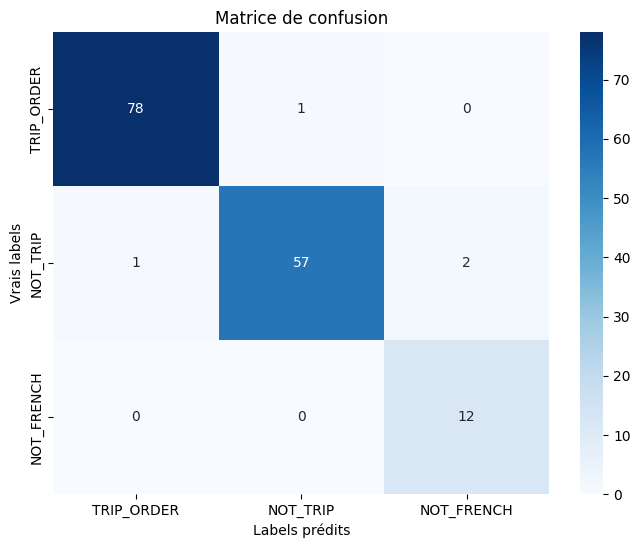

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Labels prédits")
plt.ylabel("Vrais labels")
plt.title("Matrice de confusion")
plt.show()